# Import necessary packages

In [3]:
from aeon.transformations.collection.shapelet_based import (
    RandomDilatedShapeletTransform
)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Generate synthetic datasets

In [14]:
# Generate a dataset with 2000 samples and 7 columns, random values from 0 to 1000
X_train = np.random.randint(0, 1000, (2000, 7))

X_train

array([[461, 726, 251, ..., 295, 724, 719],
       [748, 337, 878, ..., 791, 921, 216],
       [763, 187, 379, ...,  40, 156,  14],
       ...,
       [549, 680, 867, ..., 202, 324, 824],
       [784, 243, 326, ...,  46, 760, 590],
       [621,  12, 906, ..., 364, 601, 341]])

In [10]:
# Put values of X_train into four bins, of equivalent size
X_train_binned = np.zeros(X_train.shape)
for i in range(X_train.shape[1]):
    X_train_binned[:, i] = pd.qcut(X_train.iloc[:, i], 4, labels=False)

X_train_binned = pd.DataFrame(X_train_binned)
X_train_binned.index = X_train.index

X_train_binned

,0,1,2,3,4,5,6
cell_0_gene_0,2.0,1.0,0.0,3.0,0.0,2.0,3.0
cell_0_gene_1,1.0,0.0,0.0,2.0,0.0,1.0,3.0
cell_0_gene_2,1.0,3.0,0.0,0.0,1.0,1.0,2.0
cell_0_gene_3,1.0,1.0,0.0,0.0,3.0,3.0,2.0
cell_0_gene_4,2.0,3.0,2.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
cell_9_gene_195,1.0,2.0,2.0,0.0,2.0,2.0,2.0
cell_9_gene_196,0.0,1.0,2.0,0.0,0.0,3.0,0.0
cell_9_gene_197,0.0,2.0,2.0,0.0,0.0,2.0,1.0
cell_9_gene_198,3.0,1.0,1.0,2.0,2.0,2.0,1.0


In [134]:
# generate an array of random integers in the range 1-8
np.random.seed(42)
y_train = np.random.randint(1, 8, 2000)

y_train

array([7, 4, 5, ..., 5, 1, 2])

# Shapelet transform

In [112]:
t = RandomDilatedShapeletTransform(
    shapelet_lengths= [3,4],
    max_shapelets= 10000
)
t.fit(X_train_binned)
X_t = t.transform(X_train_binned)

In [113]:
X_t

array([[2.52742035, 1.        , 2.        , ..., 2.        , 3.        ,
        1.        ],
       [2.30940108, 1.        , 1.        , ..., 2.        , 3.        ,
        1.        ],
       [1.78885438, 2.        , 1.        , ..., 6.        , 1.        ,
        0.        ],
       ...,
       [1.20604538, 3.        , 1.        , ..., 4.        , 2.        ,
        0.        ],
       [1.78885438, 1.        , 1.        , ..., 4.        , 1.        ,
        0.        ],
       [2.30940108, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

### Distance from shapelet extraction

In [114]:
# Rename rownames as "cell_X_gene_Y"
X_t = pd.DataFrame(X_t)
X_t.index = ["cell_{}_gene_{}".format(i, j) for i in range(10) for j in range(200)]

# Cycle over columns and create three subdataframes: one with columns i, i+3, i+6, ..., one with columns i+1, i+4, i+7, ..., and one with columns i+2, i+5, i+8, ...
X_t_dist = X_t.iloc[:, range(0, X_t.shape[1], 3)]
X_t_argmin = X_t.iloc[:, range(1, X_t.shape[1], 3)]
X_t_SO = X_t.iloc[:, range(2, X_t.shape[1], 3)]

X_t_dist.index = X_t.index
X_t_argmin.index = X_t.index
X_t_SO.index = X_t.index

# reset column index to 0, 1, 2, ...
X_t_dist.columns = range(X_t_dist.shape[1])
X_t_argmin.columns = range(X_t_argmin.shape[1])
X_t_SO.columns = range(X_t_SO.shape[1])

X_t_dist


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
cell_0_gene_0,2.527420,8.796911e-01,2.309401,2.0,2.0,3.0,3.632993,3.0,2.0,2.236016,...,1.948736,2.058627,3.983128,2.449490,2.220446e-16,3.442061,1.414214e+00,3.079201,0.000000,2.0
cell_0_gene_1,2.309401,0.000000e+00,1.757723,4.0,3.0,3.0,3.154701,2.0,2.0,1.757723,...,1.948736,1.809068,3.618136,2.449490,0.000000e+00,2.412091,1.414214e+00,3.515446,0.534522,2.0
cell_0_gene_2,1.788854,0.000000e+00,1.154701,3.0,3.0,5.0,3.632993,0.0,1.0,3.809068,...,2.672612,1.632993,1.632993,2.449490,8.796911e-01,1.396977,3.863703e+00,2.309401,1.948736,6.0
cell_0_gene_3,1.788854,2.220446e-16,3.154701,1.0,3.0,5.0,2.000000,2.0,1.0,2.839039,...,4.810702,2.828427,2.828427,2.672612,2.828427e+00,1.396977,1.948736e+00,1.154701,1.948736,2.0
cell_0_gene_4,4.098255,0.000000e+00,3.227064,4.0,2.0,4.0,2.752989,1.0,2.0,3.959034,...,0.879691,3.598227,0.917663,2.449490,8.659740e-15,1.757723,2.828427e+00,4.618802,1.948736,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_9_gene_195,2.309401,2.828427e+00,3.515446,1.0,1.0,3.0,1.396977,2.0,1.0,2.412091,...,2.672612,2.309401,1.809068,0.000000,2.828427e+00,3.515446,2.828427e+00,0.000000,0.879691,2.0
cell_9_gene_196,2.309401,2.220446e-16,1.757723,4.0,4.0,4.0,1.396977,1.0,1.0,0.000000,...,1.948736,1.809068,1.809068,2.672612,2.220446e-16,2.963769,0.000000e+00,3.515446,1.948736,3.0
cell_9_gene_197,1.206045,0.000000e+00,3.154701,3.0,3.0,5.0,0.000000,1.0,1.0,1.396977,...,2.984012,2.828427,2.828427,2.449490,1.414214e+00,2.412091,0.000000e+00,3.154701,1.948736,4.0
cell_9_gene_198,1.788854,2.220446e-16,4.618802,2.0,1.0,2.0,3.154701,2.0,2.0,3.515446,...,2.984012,4.637495,2.309401,2.449490,2.828427e+00,1.396977,2.220446e-16,0.000000,1.948736,4.0


In [115]:
# Show the shapelets
len(t.shapelets_[0])

10000

### Filtering out negative shapelets

In [116]:
shapelets_list = t.shapelets_[0]
shapelets_filt_bool = []  # Initialize shapelets_filt_bool as an empty list

# Check whether shapelets_filt[i] contains negative or Inf values
for i in range(len(shapelets_list)):
    shapelets_filt_bool.append(np.all((shapelets_list[i] > 0) & (shapelets_list[i] != np.inf)))

In [117]:
# Filter out X_t columns the shapelets that contain negative or Inf values based on shapelets_filt_bool
X_t_filt = X_t_dist.loc[:, shapelets_filt_bool]

X_t_filt

,5,53,85,89,149,152,187,222,226,262,...,9694,9704,9773,9783,9796,9801,9927,9941,9967,9989
cell_0_gene_0,3.0,3.0,5.0,4.0,4.0,2.0,4.0,3.0,5.0,5.0,...,5.0,2.0,3.0,4.0,3.0,2.0,4.0,3.0,2.0,4.0
cell_0_gene_1,3.0,4.0,6.0,4.0,4.0,2.0,4.0,3.0,4.0,6.0,...,5.0,2.0,4.0,5.0,3.0,4.0,6.0,5.0,2.0,4.0
cell_0_gene_2,5.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,5.0,...,5.0,4.0,4.0,4.0,3.0,3.0,6.0,5.0,2.0,4.0
cell_0_gene_3,5.0,3.0,5.0,3.0,3.0,4.0,4.0,3.0,5.0,5.0,...,3.0,4.0,4.0,2.0,5.0,3.0,4.0,5.0,2.0,4.0
cell_0_gene_4,4.0,6.0,4.0,4.0,4.0,5.0,3.0,6.0,2.0,2.0,...,4.0,5.0,5.0,3.0,4.0,4.0,3.0,4.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cell_9_gene_195,3.0,3.0,4.0,1.0,1.0,2.0,2.0,3.0,3.0,4.0,...,3.0,2.0,4.0,3.0,1.0,3.0,4.0,3.0,4.0,2.0
cell_9_gene_196,4.0,4.0,6.0,4.0,4.0,3.0,5.0,4.0,4.0,6.0,...,6.0,3.0,5.0,5.0,4.0,4.0,7.0,4.0,3.0,5.0
cell_9_gene_197,5.0,4.0,5.0,3.0,3.0,4.0,4.0,5.0,3.0,5.0,...,5.0,4.0,6.0,4.0,3.0,5.0,6.0,4.0,4.0,4.0
cell_9_gene_198,2.0,1.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0


# Visualization: clustering

In [137]:
# count zeros in each column (zero = shapelet present as distance is zero)
X_t_filt_zeros = X_t_filt.apply(lambda x: x.value_counts().get(0, 0), axis=0)

X_t_filt_zeros

5       33
53      26
85      38
89      36
149     36
        ..
9801    36
9927    33
9941    27
9967    28
9989    26
Length: 338, dtype: int64

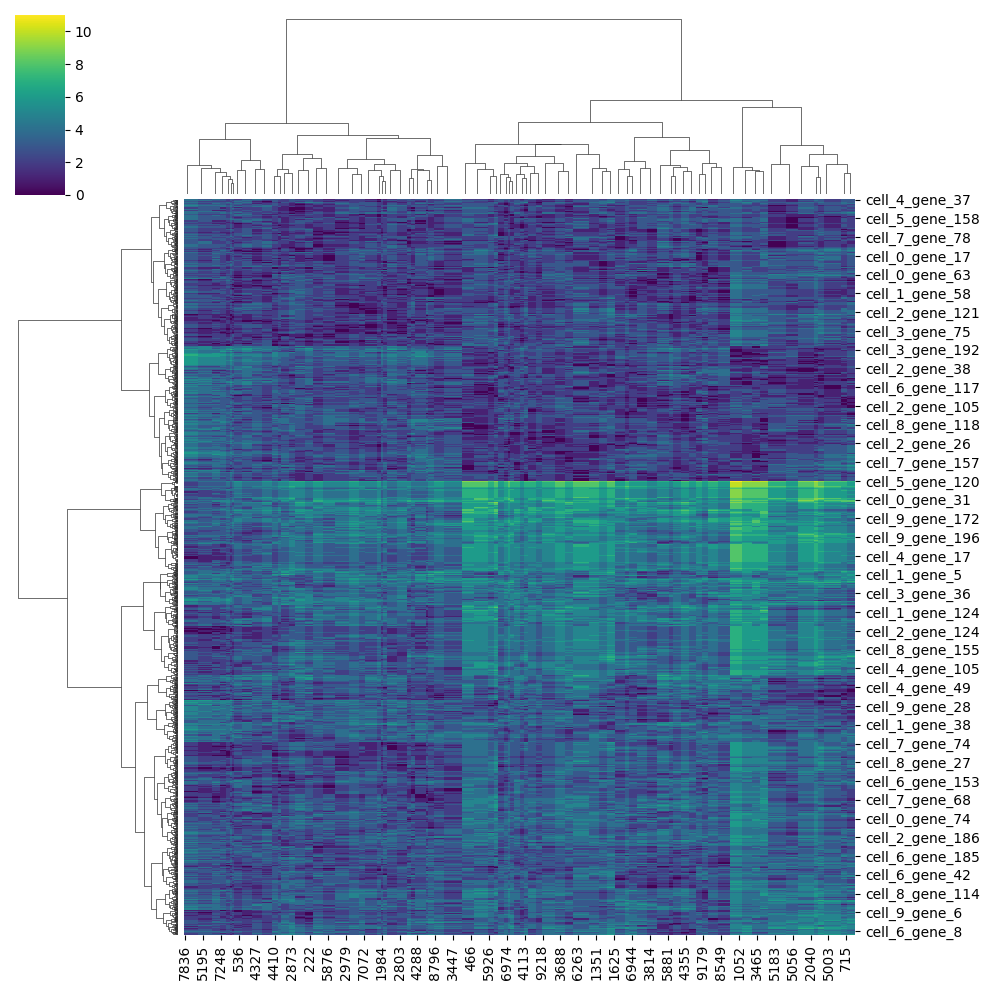

In [121]:
# heatmap of X_t_filt, with clustering
sns.clustermap(X_t_filt, cmap="viridis", method="ward")
plt.show()

In [127]:

import matplotlib.pyplot as plt

import seaborn as sns; sns.set(color_codes=True)  # for plot styling

from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans

   ---------------------------------------- 0.0/96.5 kB ? eta -:--:--
   ---------------------------------------- 96.5/96.5 kB 2.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Dendrogram

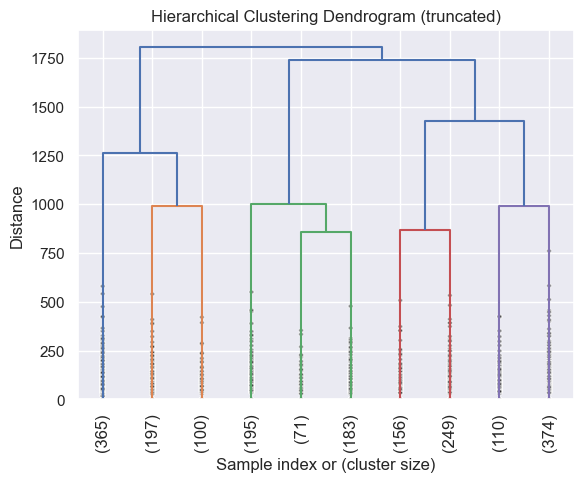

In [129]:
plt.figure()
H_cluster = linkage(X_t_dist,'ward')
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Sample index or (cluster size)')
plt.ylabel('Distance')
dendrogram(
    H_cluster,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

# Elbow Method

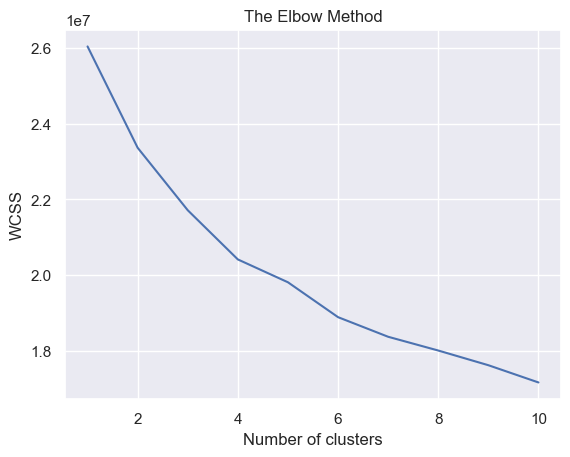

In [130]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    #kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_t_dist)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# PCA and Kmeans

In [131]:
pca=PCA()

#Fit PCA to the dataset (only variables, excluding class)
pca.fit(X_t_dist)

#Calculating rotated PCA scores
datatrans=pca.transform(X_t_dist)

### Plot clusters from Kmeans

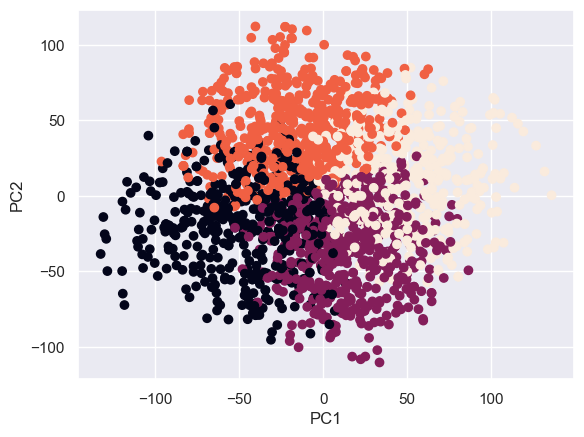

In [132]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
pred_kmeans = kmeans.fit_predict(X_t_dist)
pred_kmeans = pred_kmeans+1

plt.figure()
plt.scatter(datatrans[:,0],datatrans[:,1],c=pred_kmeans)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Plot actual classes
Obviously it's a meaningful blob since data are randomly generated 

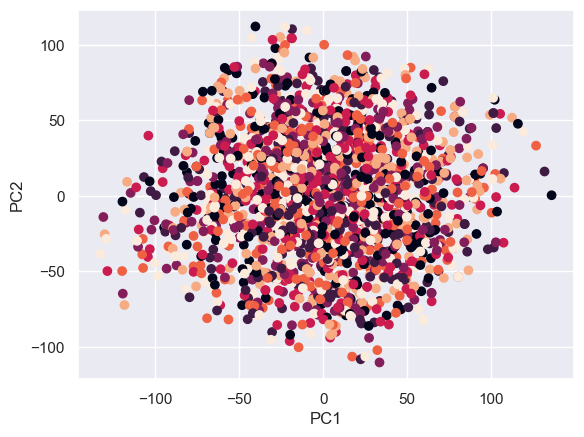

In [135]:
plt.figure()
classes=y_train
classes=pd.factorize(classes)
plt.scatter(datatrans[:,0],datatrans[:,1],c=classes[0])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()